In [2]:
import os
import sys
import csv
import shutil
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime, timedelta
from my_functions import *

import scipy.io.wavfile
from PIL import Image
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [5]:
class Image_Resize():
    def __init__(self, save_path='/Users/maggie/Desktop/TestSave_DS', img_path=None, ds_size=32):
        self.ds_size = ds_size
        self.img_path = img_path
        self.save = make_storage_directory(os.path.join(save_path, f'test_{self.ds_size}'))
        self.small_img = None
        self.small_array = None
                                        


    def load_image(self):
        im = Image.open(self.img_path)
#         self.small_img = im.resize((self.ds_size, self.ds_size), Image.BILINEAR)
#         self.small_array = np.array(list(self.small_img.getdata()))#.reshape((self.ds_size, self.ds_size))
        
        im_array = np.array(list(im.getdata()))
        ave_pxl = np.mean(im_array)
        if ave_pxl > 50:
            print(ave_pxl)
            display(im)
#         print(self.small_array)


    def save_image(self,fname_append=''):
        im = self.small_img
        imname = os.path.basename(self.img_path).strip('_photo.png')
        fname = os.path.join(self.save, f'{fname_append}{imname}.png')
        im.save(fname)

In [ ]:
test_save = make_storage_directory('/Users/maggie/Desktop/TestSave_DS')

# For Zipping the Images hub-wise

path = '/Volumes/TOSHIBA-21/H1-red'
for hub_folder in glob(os.path.join(path, 'RS*')):
    img_folder = glob(os.path.join(hub_folder, 'img-downsized-32'))[0]
    hub = os.path.basename(hub_folder)
    fname = os.path.join(test_save, f'{os.path.basename(path).split("-")[0]}-{hub}-imgs')
    print(fname)
    print(img_folder)
    shutil.make_archive(fname, 'zip', img_folder)
    break

    

#     for day_folder in glob(os.path.join(img_folder, '2019-*')):
        
#         for minute_folder in glob(os.path.join(day_folder, '*')):
#             for img_file in glob(os.path.join(minute_folder, '*.png')):
#                 save_f = os.path.join()
#                 break
                

2019-12-24_094500_RS1_H1.png
99.43773915816327


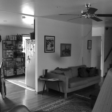

2019-12-18_071332_RS1_H1_10.png
2019-12-18_230600_RS1_H1_32.png
2019-11-06_075801_RS1_H1.png
85.61607142857143


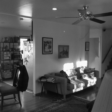

2019-11-08_135800_RS1_H1_120.png
120.09821428571429


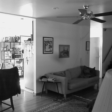

2019-11-06_081200_RS1_H1.png
95.4508131377551


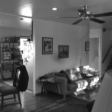

2019-12-24_085800_RS1_H1.png
105.73222257653062


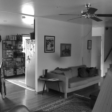

In [6]:
image_paths = glob('/Users/maggie/Desktop/images_for_brightness/*.png')


for im in image_paths:
    print(os.path.basename(im))
    Im = Image_Resize(img_path=im)
    Im.load_image()
#     Im.save_image(fname_append='from112_')
    

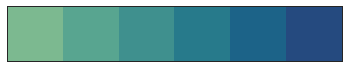

In [71]:
# plt.rcParams['figure.figsize']=(8,6)
sns.set_style("white")

sns.set_context("paper")

# # sns.set_palette(sns.color_palette("deep"))


# custom_palette = sns.color_palette("Set1")
# sns.set_palette(custom_palette)



mpl_update = {
    'font.size': 20,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'figure.figsize': [9,6],
    'axes.labelsize': 32,
    'axes.titlesize': 32,
    'lines.linewidth': 4,
    'legend.markerscale':6.0,
    'legend.fontsize': 24
}
plt.rcParams.update(mpl_update)

c1, c2 = sns.color_palette("crest")[0], sns.color_palette("crest")[-1]
sns.palplot(sns.color_palette("crest"))

In [4]:
def return_steps(wav_path):
    wav_name = os.path.basename(wav_path)
    t = wav_name.split(' ')[-1].strip('._audio.wav')
    time_file = f'{t[0:2]}:{t[2:4]}:{t[4:6]}'
            
    _, wav = scipy.io.wavfile.read(wav_path)

    len_wav = int(len(wav))
    num_final_datapoint = 800
    inc = int(len(wav)/num_final_datapoint)

    shift_audio = wav - np.mean(wav) # Mean Shift
    
    rect_audio = abs(shift_audio)
    downsampled_audio = rect_audio[0::inc]
    
    return wav, shift_audio, rect_audio, downsampled_audio

In [24]:
def print_step(ys, yq, step=0, save=False):
#     plt.clf()
#     c1, c2 = sns.color_palette("crest")[0], sns.color_palette("crest")[-1]
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    y = np.linspace(0,10,len(ys))
    
    plt.plot(y,ys, label='Noise', color=c1)
    plt.plot(y, yq, label='Quiet', alpha=0.6, color=c2)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.legend()
    plt.tight_layout()
    sns.despine()
    
    if save:
        target_fname = f'audio_step{step}.pdf'
        target_dir = make_storage_directory(f'/Users/maggie/Desktop/Audio_plots/')
        plt.savefig(os.path.join(target_dir, target_fname))
    else:
        plt.show()


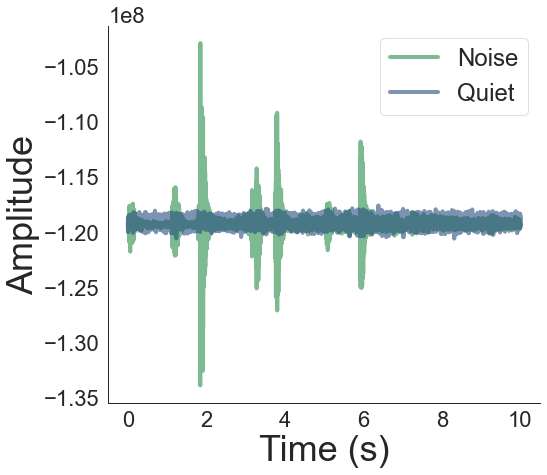

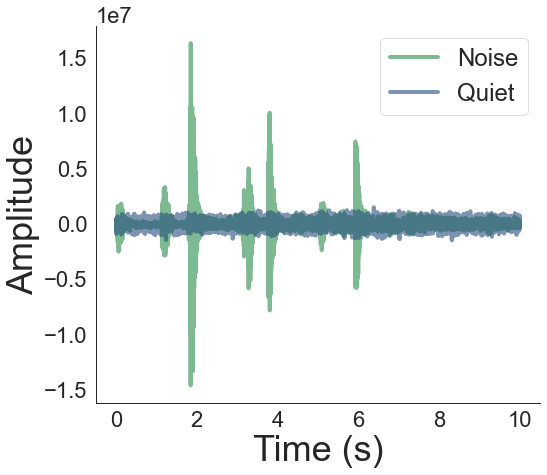

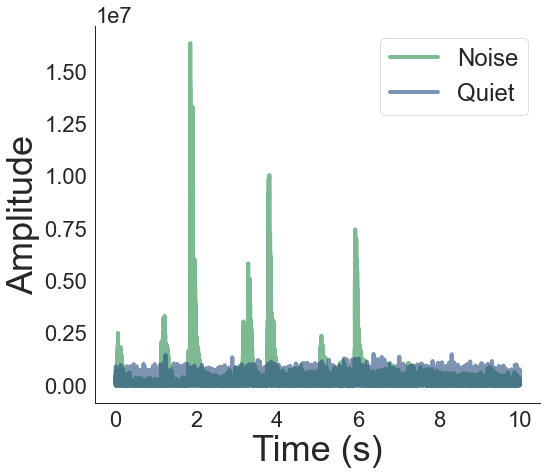

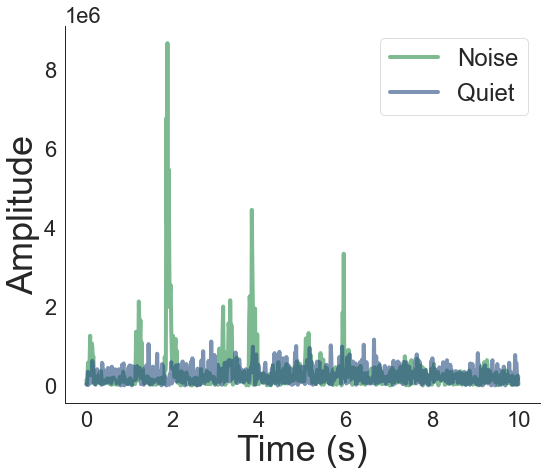

In [115]:
noSound = '/Users/maggie/Desktop/HPD_images_audio/audio_files_to_plot/2019-11-27 133900_audio_RS1_noSound.wav'
Noise = '/Users/maggie/Desktop/HPD_images_audio/audio_files_to_plot/2019-11-05 163400_audio_RS1_movement1.wav'


noise_steps = return_steps(Noise)
quiet_steps = return_steps(noSound)

for i in range(0,4):
    print_step(noise_steps[i], quiet_steps[i], step=i, save=True)

In [123]:
path = '/Volumes/TOSHIBA-18/H6-black/'

home_system = os.path.basename(path.strip('/'))
H = home_system.split('-')
H_num, color = H[0], H[1][0].upper()

hubs = mylistdir(path, bit=f'{color}S', end=False)
hub = hubs[1]

full_file = glob(os.path.join(path, hub, 'processed_env', '*_full_cleaned.csv'))[0]

df = pd.read_csv(full_file)
df.timestamp = pd.to_datetime(df.timestamp)
print(df.head())

            timestamp  tvoc_ppb  temp_c  rh_percent  light_lux  co2eq_ppm  \
0 2019-10-09 21:25:00       0.0    27.4        27.6      101.0      400.0   
1 2019-10-09 21:25:10       0.0    27.4        27.5      101.0      400.0   
2 2019-10-09 21:25:20       0.0    27.4        27.5      101.0      400.0   
3 2019-10-09 21:25:30       0.0    27.4        27.4      101.0      400.0   
4 2019-10-09 21:25:40       0.0    27.4        27.4      101.0      400.0   

   dist_mm  hub  Modified_temp_c  Modified_rh_percent  Modified_tvoc_ppb  \
0   3378.0  BS3              0.0                  0.0                0.0   
1   3338.0  BS3              0.0                  0.0                0.0   
2   3209.0  BS3              0.0                  0.0                0.0   
3   3273.0  BS3              0.0                  0.0                0.0   
4   3327.0  BS3              0.0                  0.0                0.0   

   Modified_co2eq_ppm  Modified_light_lux  Modified_dist_mm  
0                 

In [124]:
start_date = '2019-11-03 00:00:00'
start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = start_date + timedelta(days=1)
small_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] < end_date)]

In [220]:
def plot_mod(df, y_mod = '', ylab = '', y_lim=None, save=True, title='', color=c1):#, fnt_sze=32):
    
    ax = sns.lineplot(x='timestamp', y=y_mod, data=df, color=color)
    plt.xlabel('')
    plt.ylabel(ylab)#, fontsize=fnt_sze)
#     plt.title(start_date.strftime("%Y-%m-%d"))#, fontsize=fnt_sze)
#     plt.title(title)

    if y_lim != None:
        ax.set(xlim=(df['timestamp'].min(), df['timestamp'].max()), ylim=y_lim)
    else:
        ax.set(xlim=(df['timestamp'].min(), df['timestamp'].max()))

    date_form = DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation=45)
    sns.despine()
    
    if y_mod == 'Maggie':
        print('occupancy')
        ax.set(yticks=[0,1,1])
#         plt.yticks = []
#         ax.set(yticklabels=[])
#     plt.show()
    plt.tight_layout()

    if save:
        target_fname = f'{H_num}-{hub}-{start_date.strftime("%m%d")}_{y_mod}.pdf'
        target_dir = make_storage_directory(f'/Users/maggie/Desktop/audio_plots/')
        plt.savefig(os.path.join(target_dir, target_fname))
    else:
        plt.show()
    
    plt.clf()

In [221]:

# plt.rcParams['figure.figsize']=(9,6)

# plot_mod(small_df, y_mod = 'temp_c', ylab = 'degree C', y_lim=(20, 30), title='Temperature')
# plot_mod(small_df, y_mod = 'rh_percent', ylab = 'rH (%)')
# plot_mod(small_df, y_mod = 'tvoc_ppb', ylab = 'TVOC (ppb)')
# plot_mod(small_df, y_mod = 'co2eq_ppm', ylab = 'CO2 (ppm)')
# plot_mod(small_df, y_mod = 'light_lux', ylab = 'Luminance (lux)')
# plot_mod(small_df, y_mod = 'dist_mm', ylab = 'Distance (mm)')

plot_mod(small_df, y_mod = 'temp_c', ylab = 'degree C', y_lim=(20, 30), title='Temperature')
plot_mod(small_df, y_mod = 'rh_percent', ylab = '% rH', title='Relative Humidity')
plot_mod(small_df, y_mod = 'tvoc_ppb', ylab = 'ppb', title='TVOC')
plot_mod(small_df, y_mod = 'co2eq_ppm', ylab = 'ppm', title='CO2')
plot_mod(small_df, y_mod = 'light_lux', ylab = 'Lux', title='Illuminance')
plot_mod(small_occ, y_mod = 'Maggie', title='Occupancy', y_lim=(-0.3, 1.3), color=c2)

occupancy


<Figure size 648x432 with 0 Axes>

In [201]:
occ_file = glob(os.path.join(path, 'Inference_DB', 'Full_inferences', '*_occupancy.csv'))[0]
occ = pd.read_csv(occ_file)
occ.timestamp = pd.to_datetime(occ.timestamp)

small_occ = occ[(occ['timestamp'] >= start_date) & (occ['timestamp'] < end_date)]
plot_mod(small_occ, y_mod = 'Maggie', title='Occupancy', y_lim=(-0.3, 1.3), save=True)

occupancy


<Figure size 648x432 with 0 Axes>

In [25]:
plt.rcParams['figure.figsize']=(14,6)
sns.set_style("white")

sns.set_context("paper", font_scale=2.7, rc={'lines.linewidth':2})

# # sns.set_palette(sns.color_palette("deep"))


custom_palette = sns.color_palette("crest")
sns.set_palette(custom_palette)

In [28]:
path = '/Volumes/TOSHIBA-22/H2-red/RS1/processed_env/H2_RS1_full_cleaned.csv'
df = pd.read_csv(path,index_col=0)
df.index = pd.to_datetime(df.index)
df["day"] = df.index.date
df["time"] = df.index.time
print(df.columns)

Index(['tvoc_ppb', 'temp_c', 'rh_percent', 'light_lux', 'co2eq_ppm', 'dist_mm',
       'hub', 'Modified_temp_c', 'Modified_rh_percent', 'Modified_tvoc_ppb',
       'Modified_co2eq_ppm', 'Modified_light_lux', 'Modified_dist_mm', 'day',
       'time'],
      dtype='object')


<AxesSubplot:xlabel='time', ylabel='rh_percent'>

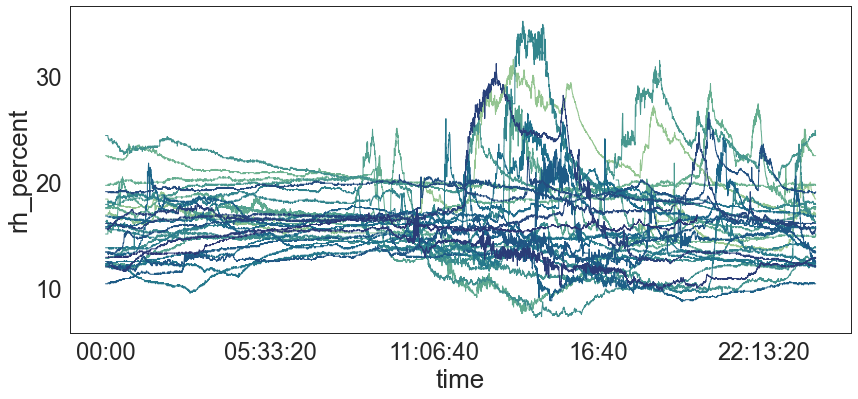

In [32]:
sns.lineplot(data=df,x='time', y='rh_percent', hue="day", 
             palette=sns.color_palette("crest", len(df.day.unique())),
             estimator=None, lw=1, legend=False)

# n = len(df.day.unique())
# print(n)
# p = sns.color_palette("crest", len(df.day.unique()))

In [6]:
csv_audio = '/Volumes/TOSHIBA-13/H3-red/RS1/audio/2019-07-16/1543/2019-07-16_154300_RS1_H3_audio.csv'

fname = os.path.basename(csv_audio).split('_')
new_name = f'{fname[0]} {fname[1]}_audio.wav'

with open(csv_audio) as csv_file:
    csv_reader = csv.reader(csv_file)
    data = []
    for row in csv_reader:
        data.append(int(row[0]))
csv_data = np.array(data, dtype=np.int32)
scipy.io.wavfile.write(os.path.join('/Users/maggie/Desktop/', new_name), 8000, csv_data)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/TOSHIBA-13/H3-red/RS1/audio/2019-07-16/1543/2019-07-16_154300_RS1_H3_audio.csv'

In [8]:
orig_files = glob('/Users/maggie/Desktop/HPD_images_audio/audio_files_to_plot/*.wav')
for f in orig_files:
    print(os.path.basename(f))
    
file1 = orig_files[-2]
store_loc = make_storage_directory('/Users/maggie/Desktop/HPD_images_audio/audio_files_to_plot/notds')

2019-11-05 163400_audio_RS1_movement1.wav
2019-12-24 181900_audio_RS2_loudTalk.wav
2019-11-06 205630_audio_RS3_loudTalk1.wav
2019-11-27 133900_audio_RS1_noSound.wav
2019-12-25 144500_audio_RS3_loudTalk2.wav
2019-11-05 220730_audio_RS1_softTalk.wav


In [70]:
def process_wav(wav_path, fs=8000, ds=1):
    fname = os.path.basename(wav_path).split('_')[-1].strip('.wav')
    save_path = os.path.join(store_loc, f'{fname}_{fs}.csv')
    wav_save = os.path.join(store_loc, f'{fname}_{ds}_ps.wav')

    br, wav = scipy.io.wavfile.read(wav_path) # _ should be same fs
    inc = int(fs/ds)
    print(inc)
#     fs = int(fs/ds)

    m = np.mean(wav)
    processed_audio = wav
    
    processed_audio = processed_audio - m    # Mean Shift
    processed_audio = abs(processed_audio)   # Full wave rectify
    processed_audio = processed_audio + m    # Add back the mean
    
    processed_audio = np.array([np.int32(x) for x in processed_audio])
    
    downsampled = processed_audio[0::ds]  # Downsample

#     scipy.io.wavfile.write(wav_save, inc, downsampled)


process_wav(file1, ds=10)

800


In [11]:
def write_wav(csv_audio, fs=8000):
    fname = os.path.basename(csv_audio).strip('.csv')
    save_path = os.path.join(store_loc, f'{fname}.wav')
    print(save_path)
    
    with open(csv_audio, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        data = []
        for row in csv_reader:
#             print(float(row[0]))
            data.append(np.int32(float(row[0])))
    csv_data = np.array(data, dtype=np.int32)
    print(csv_data[0], type(csv_data[0]))
    
    scipy.io.wavfile.write(save_path, fs, csv_data)

fromcsv = glob('/Users/maggie/Desktop/HPD_images_audio/audio_files_to_plot/notds/*.csv')[0]
write_wav(fromcsv)

IndexError: list index out of range

In [12]:
def write_csv(wav_path):
    _, wav = scipy.io.wavfile.read(wav_path)
    print(len(wav))
#     fname = os.path.basename(wave_path)
    store_path = os.path.join(store_loc, os.path.basename(wave_path))
    scipy.io.wavfile.write(store_path, 8000, wav)
    

                                     
    
    